## **UKESM1 Meridional ovErTurning ciRculation diagnostIC (METRIC) Configurations**

#### Created By:

Ollie Tooth (oliver.tooth@noc.ac.uk)

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

In [6]:
fpath="/g100/home/userexternal/otooth00/OptimESM/data/CINECA/MOHC/UKESM1_Ofx/domain_cfg_Ofx_UKESM1.nc"
ds_domain = xr.open_dataset(fpath)
ds_domain

<xarray.Dataset> Size: 665MB
Dimensions:        (y: 330, x: 360, z: 75)
Dimensions without coordinates: y, x, z
Data variables: (12/54)
    bathy_metry    (y, x) float32 475kB ...
    bottom_level   (y, x) int32 475kB ...
    e1f            (y, x) float64 950kB ...
    e1t            (y, x) float64 950kB ...
    e1u            (y, x) float64 950kB ...
    e1v            (y, x) float64 950kB ...
    ...             ...
    mask_csgrpemp  (y, x) int32 475kB ...
    mask_csgrpglo  (y, x) int32 475kB ...
    mask_csgrprnf  (y, x) int32 475kB ...
    mask_csrnf     (y, x) int32 475kB ...
    mask_csundef   (y, x) int32 475kB ...
    mask_opensea   (y, x) int32 475kB ...
Attributes:
    DOMAIN_number_total:     1
    DOMAIN_number:           0
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [362 332]
    DOMAIN_size_local:       [362 332]
    DOMAIN_position_first:   [1 1]
    DOMAIN_position_last:    [362 332]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    history:                 Mon Jun  5 12:41:32 2023: ncks -A mask.nc ORCA1_...
    NCO:                     4.4.7

In [ ]:
fpath="/g100_store/DRES_OptimESM/ESGF/prepub/mohc/20240619/CMIP6/CMIP/MOHC/UKESM1-2/esm-hist/r1i1p1f1/Omon/so/gn/v20240619/so_Omon_UKESM1-2-LL_esm-hist_r1i1p1f1_gn_185001-189912.nc"
ds_so = xr.open_dataset(fpath)

ds_so

In [ ]:
i1 = 206
i2 = 280
j1 = 228
j2 = 228

plt.pcolormesh(ds_so.longitude, ds_so.latitude, ds_so.so.isel(time=0, lev=0))
plt.plot(ds_so.longitude.isel(i=slice(i1, i2), j=j1), ds_so.latitude.isel(i=slice(i1, i2), j=j1))

plt.xlim([-85, 10])
plt.ylim([5, 35])

In [ ]:
ds_so.so.isel(time=0, i=slice(i1, i2), j=j1).plot()

In [ ]:
ds_so.latitude.isel(i=slice(i1, i2), j=j1).mean()

In [ ]:
(ds_so.so.isel(time=0, i=slice(i1, i2), j=j1) == 0).plot()

### **Define NEMO t/u/v masks**

In [2]:
# Example T-grid file:
fpath="/g100_store/DRES_OptimESM/ESGF/prepub/mohc/20240619/CMIP6/CMIP/MOHC/UKESM1-2/esm-hist/r1i1p1f1/Omon/thetao/gn/v20240619/thetao_Omon_UKESM1-2-LL_esm-hist_r1i1p1f1_gn_185001-189912.nc"
ds_thetao = xr.open_dataset(fpath)

# Example U-grid file:
fpath="/g100_store/DRES_OptimESM/ESGF/prepub/mohc/20240619/CMIP6/CMIP/MOHC/UKESM1-2/esm-hist/r1i1p1f1/Omon/uo/gn/v20240619/uo_Omon_UKESM1-2-LL_esm-hist_r1i1p1f1_gn_185001-189912.nc"
ds_uo = xr.open_dataset(fpath)

# Example V-grid file:
fpath="/g100_store/DRES_OptimESM/ESGF/prepub/mohc/20240619/CMIP6/CMIP/MOHC/UKESM1-2/esm-hist/r1i1p1f1/Omon/vo/gn/v20240619/vo_Omon_UKESM1-2-LL_esm-hist_r1i1p1f1_gn_185001-189912.nc"
ds_vo = xr.open_dataset(fpath)

In [ ]:
fpath="/g100/home/userexternal/otooth00/OptimESM/data/CINECA/MOHC/UKESM1_Ofx/domain_cfg_Ofx_UKESM1.nc"
ds_domain = xr.open_dataset(fpath)
ds_domain

In [3]:
t_mask = ~(ds_thetao["thetao"].isel(time=0) == 0)
u_mask = ~(ds_uo["uo"].isel(time=0) == 0)
v_mask = ~(ds_vo["vo"].isel(time=0) == 0)

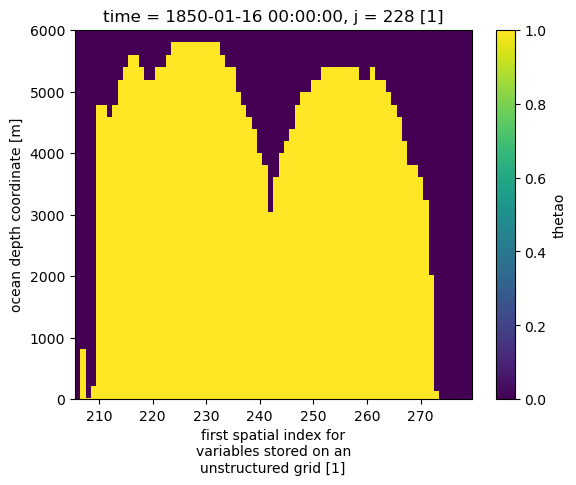

In [5]:
i1 = 206
i2 = 280
j1 = 228
j2 = 228

t_mask.isel(i=slice(i1, i2), j=j1).plot()

In [14]:
# Use UKESM1 domain_cfg file as template DataSet:
fpath="/g100/home/userexternal/otooth00/OptimESM/data/CINECA/MOHC/UKESM1_Ofx/domain_cfg_Ofx_UKESM1.nc"
ds_domain = xr.open_dataset(fpath)

ds_domain = ds_domain.drop_vars(ds_domain.data_vars)
ds_domain["tmask"] = t_mask
ds_domain["umask"] = u_mask
ds_domain["vmask"] = v_mask

# Write masks to mesh_mask netCDF file:
out_fpath="/g100/home/userexternal/otooth00/OptimESM/data/CINECA/MOHC/UKESM1_Ofx/mesh_mask_Ofx_UKESM1.nc"
ds_domain.to_netcdf(out_fpath)

In [15]:
xr.open_dataset(out_fpath)

<xarray.Dataset> Size: 29MB
Dimensions:    (lev: 75, j: 330, i: 360)
Coordinates:
    time       object 8B ...
  * lev        (lev) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 322 323 324 325 326 327 328 329
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 950kB ...
    longitude  (j, i) float64 950kB ...
Data variables:
    tmask      (lev, j, i) bool 9MB ...
    umask      (lev, j, i) bool 9MB ...
    vmask      (lev, j, i) bool 9MB ...
Attributes:
    DOMAIN_number_total:     1
    DOMAIN_number:           0
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [362 332]
    DOMAIN_size_local:       [362 332]
    DOMAIN_position_first:   [1 1]
    DOMAIN_position_last:    [362 332]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    history:                 Mon Jun  5 12:41:32 2023: ncks -A mask.nc ORCA1_...
    NCO:                     4.4.7

### **Testing METRIC Outputs**

In [5]:
fpath="/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/MOHC/UKESM1-2-LL_esm-hist_r1i1p1f1_1850-01-2014-12_natl_meridional_transports_at_26N.nc"

ds_test = xr.open_dataset(fpath)
ds_test

<xarray.Dataset> Size: 525MB
Dimensions:        (time: 1980, z: 75, zbounds: 76, x: 71, xbounds: 72)
Coordinates:
  * time           (time) datetime64[ns] 16kB 1850-01-16 ... 2014-12-16
  * z              (z) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * zbounds        (zbounds) float64 608B 0.0 1.012 2.1 ... 5.8e+03 6.004e+03
  * x              (x) float64 568B -80.5 -79.5 -78.5 ... -12.5 -11.5 -10.5
  * xbounds        (xbounds) float64 576B -81.0 -80.0 -79.0 ... -11.0 -9.997
Data variables: (12/62)
    dz             (z) float64 600B ...
    dx             (x) float64 568B ...
    v              (time, z, x) float64 84MB ...
    vgeo           (time, z, x) float64 84MB ...
    dh             (time, z, xbounds) float64 86MB ...
    rho            (time, z, xbounds) float64 86MB ...
    ...             ...
    fw_fc          (time) float64 16kB ...
    fw_ek          (time) float64 16kB ...
    fw_wbw         (time) float64 16kB ...
    fw_geoint      (time) float64 16kB ...
    fw_eddy        (time) float64 16kB ...
    fw_mo          (time) float64 16kB ...
Attributes:
    geostrophic_method:           bottom-up
    geostrophic_reference_level:  4820.0
    reference_to_model_velocity:  None
    eos:                          eos80
    rhocp:                        4084625.0
    ekman_level:                  100.0
    contact:                      fredc.ucar.edu
    code_reference:               https://github.com/NCAR/metric
    method_references:            (1) McCarthy, G. D., and Coauthors, 2015: M...

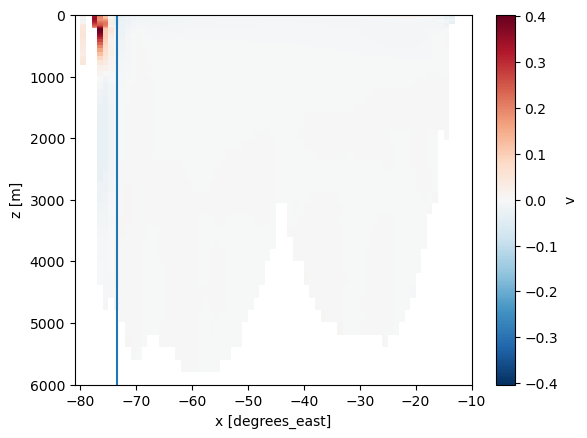

In [9]:
ds_test.v.mean(dim="time").plot()
plt.ylim([6000, 0])
plt.axvline(x=-73.5)

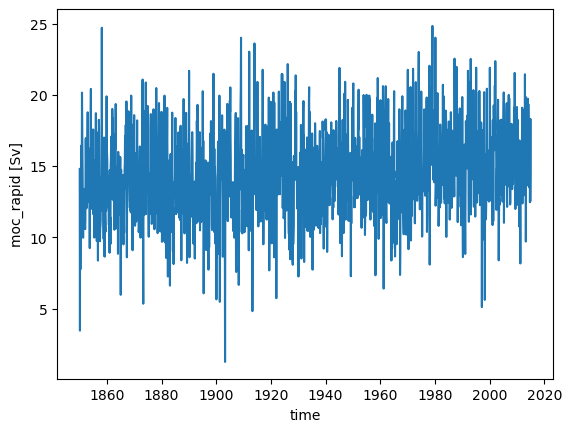

In [10]:
ds_test.moc_rapid.plot()